# Solving Sudoku with Simulated Annealing

This notebook demonstrates how to solve Sudoku puzzles using simulated annealing. Simulated annealing is an heuristic optimization technique inspired by the annealing process in metallurgy. It is useful for finding approximate solutions to optimization problems, when the search space is very large. It is often used to solve problems where the search space is discrete.

### Importing Libraries

In [1]:
# Importing the required libraries and functions
%pip install py-sudoku

import numpy as np
import matplotlib.pyplot as plt
from simulated_annealing import simulated_annealing as sa
from simulated_annealing import simulated_annealing_e as sa_e
from functools import partial
from sudoku_solver import *
from sudoku import Sudoku

Note: you may need to restart the kernel to use updated packages.


## Genereating the Sudoku puzzle

We start by generating a random Sudoku puzzle.

In [2]:
# Generate a random Sudoku board
difficulty = 0.6
lenght, width = 3, 3 
sudoku = np.array(Sudoku(lenght, width).difficulty(difficulty).board, dtype=object)
for i in range(lenght*width):
    for j in range(lenght*width):
        if sudoku[i, j] == None:
            sudoku[i, j] = 0
            
sudoku = sudoku.astype(int)
print("Genereated Sudoku sudoku:")
for i in range(lenght*width):
   if i % lenght == 0 and i != 0:
       print("-"*lenght*width*2)
   for j in range(lenght*width):
       if j % width == 0 and j != 0:
           print("|", end=" ")
       print(sudoku[i, j], end=" ")
   print()

Genereated Sudoku sudoku:
4 0 7 | 5 2 0 | 3 0 0 
0 1 5 | 4 0 0 | 2 0 0 
0 0 0 | 7 0 3 | 0 0 5 
------------------
8 0 0 | 1 0 4 | 0 0 2 
0 0 0 | 0 7 9 | 5 6 8 
2 0 0 | 0 0 6 | 4 7 0 
------------------
7 0 0 | 0 0 0 | 0 1 9 
0 8 0 | 0 1 0 | 0 2 4 
0 0 0 | 8 0 0 | 0 0 0 


Next we define a masking that will help keeping some of the cells fixed and then randomly fill the cells that are equal to zero.

In [3]:
# Define a fixed mask to prevent changing the initial values
fixed_mask = sudoku != 0

sudoku_copy = np.copy(sudoku)
# Initialize the initial candidate solution
initial_solution = initial_candidate_sudoku(sudoku_copy)

### Solving the Sudoku puzzle

Now we have a Sudoku puzzle that we can solve using simulated annealing. Thus, we apply the function `simulated_annealing` to solve the puzzle. The function takes as parameters the Sudoku puzzle, the initial temperature, the cooling rate, the number of iterations, and the number of neighbors to consider.

In [4]:
# Partial function to pass the fixed mask to the neighborhood operator
neighborhood_operator_with_mask = partial(neighborhood_operator, fixed_mask=fixed_mask)

# Apply the Simulated Annealing algorithm to solve the Sudoku puzzle
#final_solution, objective_values, temperatures, accepted_moves = sa(
#    initial_solution, 
#    objective_function,
#    neighborhood_operator_with_mask, 
#    T_init=60,
#    cooling_rate=0.99,
#    max_iter=20_000,
#    reheat_threshold=500
#)

final_solution, objective_values, temperatures, accepted_moves = sa_e(
    initial_solution, 
    objective_function,
    delta_evaluation,
    neighborhood_operator_with_mask, 
    T_init=60,
    cooling_rate=0.99,
    max_iter=20_000,
    reheat_threshold=500
)

print("Objective Function Value After Solving:")
print(objective_function(final_solution))

Objective Function Value After Solving:
0


If the value of the objective function is zero, it means we have reached the global optimum, i.e we solved the suodku.
We can now print the solved Sudoku puzzle to check if it is correct.

In [5]:
print("Final Solution:")
for i in range(9):
   if i % 3 == 0 and i != 0:
       print("-"*21)
   for j in range(9):
       if j %3 == 0 and j != 0:
           print("|", end=" ")
       print(final_solution[i, j], end=" ")
   print()

Final Solution:
4 9 7 | 5 2 1 | 3 8 6 
3 1 5 | 4 6 8 | 2 9 7 
6 2 8 | 7 9 3 | 1 4 5 
---------------------
8 7 6 | 1 5 4 | 9 3 2 
1 3 4 | 2 7 9 | 5 6 8 
2 5 9 | 3 8 6 | 4 7 1 
---------------------
7 4 2 | 6 3 5 | 8 1 9 
5 8 3 | 9 1 7 | 6 2 4 
9 6 1 | 8 4 2 | 7 5 3 


We can see that the Sudoku puzzle was solved correctly. Now we can plot the objective function to see how it evolved during the optimization process, as well as the temperature and the cumulative acceptance probability.

C:\Users\bergi\AppData\Local\Temp\ipykernel_24704\1261187619.py:63: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


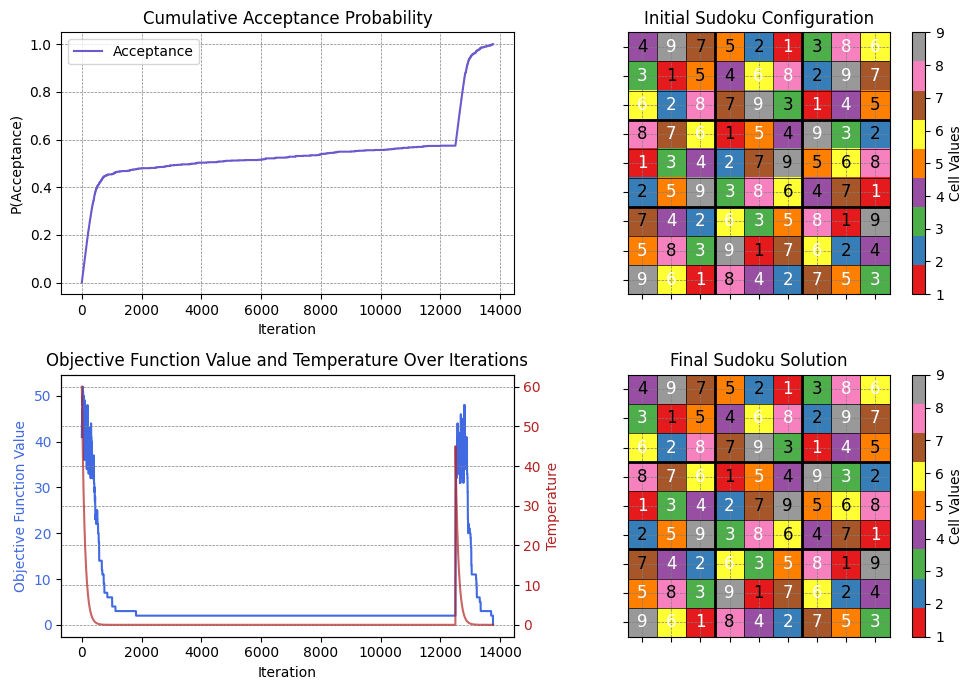

In [6]:
# 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

# Plot 1: Rejected Moves
axs[0, 0].plot(np.cumsum(accepted_moves)/sum(accepted_moves), label='Acceptance', color='slateblue')
axs[0, 0].set_xlabel('Iteration')
axs[0, 0].set_ylabel('P(Acceptance)')
axs[0, 0].set_title('Cumulative Acceptance Probability')
axs[0, 0].legend()
axs[0, 0].grid(visible=True, color='grey', linestyle='--', linewidth=0.5)

# Plot 2: Final Sudoku Solution
cax = axs[0, 1].imshow(initial_solution, cmap='Set1', interpolation='nearest')
axs[0, 1].set_title('Initial Sudoku Configuration')
plt.colorbar(cax, ax=axs[0, 1], label='Cell Values')
axs[0, 1].set_xticks(range(9))
axs[0, 1].set_yticks(range(9))
axs[0, 1].set_xticklabels([])
axs[0, 1].set_yticklabels([])
for (i, j), val in np.ndenumerate(initial_solution):
    axs[0, 1].text(j, i, int(val), ha='center', va='center', 
                   color='black' if fixed_mask[i, j] else 'white', fontsize=12)
for i in range(1, 9):
        linewidth = 2 if i % 3 == 0 else 0.5
        axs[0, 1].axhline(i - 0.5, color='black', linewidth=linewidth)
        axs[0, 1].axvline(i - 0.5, color='black', linewidth=linewidth)
axs[0, 1].grid(visible=True, color='grey', linestyle='--', linewidth=0.5)

# Plot 3: Objective Function Value and Temperature
# Objective function value axis
ax1 = axs[1, 0]  # Objective function value
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Objective Function Value', color='royalblue')
ax1.plot(objective_values, color='royalblue', label='Objective Function Value')
ax1.tick_params(axis='y', labelcolor='royalblue')
# Secondary axis for temperature
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature', color='firebrick')
ax2.plot(temperatures, color='firebrick', label='Temperature', alpha=0.7)
ax2.tick_params(axis='y', labelcolor='firebrick')
fig.tight_layout()
plt.title('Objective Function Value and Temperature Over Iterations')
plt.grid(visible=True, color='grey', linestyle='--', linewidth=0.5)


# Plot 4: Final Sudoku Solution
cax1 = axs[1, 1].imshow(final_solution, cmap='Set1', interpolation='nearest')
axs[1, 1].set_title('Final Sudoku Solution')
plt.colorbar(cax1, ax=axs[1, 1], label='Cell Values')
axs[1, 1].set_xticks(range(9))
axs[1, 1].set_yticks(range(9))
axs[1, 1].set_xticklabels([])
axs[1, 1].set_yticklabels([])
for (i, j), val in np.ndenumerate(final_solution):
    axs[1, 1].text(j, i, int(val), ha='center', va='center', 
                   color='black' if fixed_mask[i, j] else 'white', fontsize=12)
for i in range(1, 9):
        linewidth = 2 if i % 3 == 0 else 0.5
        axs[1, 1].axhline(i - 0.5, color='black', linewidth=linewidth)
        axs[1, 1].axvline(i - 0.5, color='black', linewidth=linewidth)    
axs[1, 1].grid(visible=True, color='grey', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

We can see that the objective function decreased during the optimization process, which means that the solution improved.We can also see that as the temperature decreased, the acceptance probability decreased as well. This is expected, as the probability of accepting a worse solution decreases as the temperature decreases.

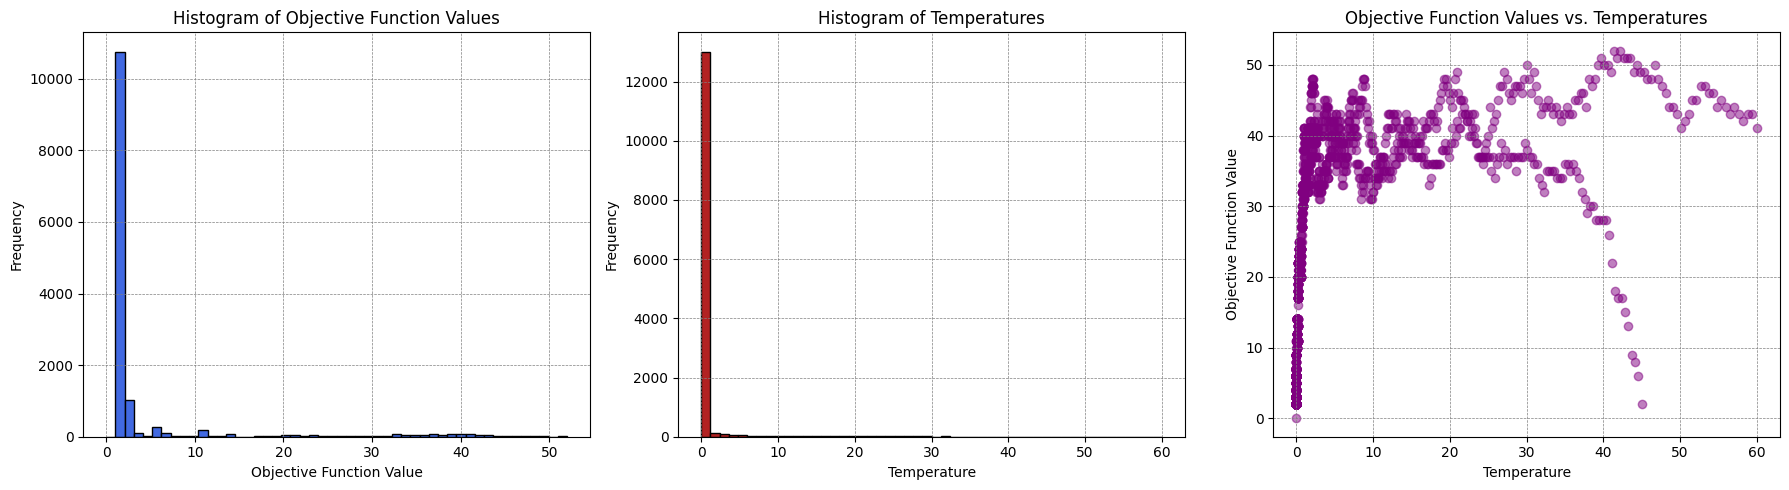

In [7]:
# Create a new figure for additional plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Histogram of Objective Function Values
axs[0].hist(objective_values, bins=50, color='royalblue', edgecolor='black')
axs[0].set_title('Histogram of Objective Function Values')
axs[0].set_xlabel('Objective Function Value')
axs[0].set_ylabel('Frequency')
axs[0].grid(visible=True, color='grey', linestyle='--', linewidth=0.5)

# Plot 2: Histogram of Temperatures
axs[1].hist(temperatures, bins=50, color='firebrick', edgecolor='black')
axs[1].set_title('Histogram of Temperatures')
axs[1].set_xlabel('Temperature')
axs[1].set_ylabel('Frequency')
axs[1].grid(visible=True, color='grey', linestyle='--', linewidth=0.5)

# Plot 3: Scatter Plot of Objective Function Values vs. Temperatures
axs[2].scatter(temperatures, objective_values, color='purple', alpha=0.5)
axs[2].set_title('Objective Function Values vs. Temperatures')
axs[2].set_xlabel('Temperature')
axs[2].set_ylabel('Objective Function Value')
axs[2].grid(visible=True, color='grey', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

## Success Rate

Finally, we can see what is the probability of the simulated annealing algorithm to find the correct solution for a given Sudoku puzzle. We do this by runing the algorithm multiple times and checking how many times it finds the correct solution.

In [8]:
difficulty = 0.6
sudoku = np.array(Sudoku(lenght, width).difficulty(difficulty).board)
for i in range(lenght*width):
    for j in range(lenght*width):
        if sudoku[i, j] == None:
            sudoku[i, j] = 0

sudoku = sudoku.astype(int)

fixed_mask = sudoku != 0
neighborhood_operator_with_mask = partial(neighborhood_operator, fixed_mask=fixed_mask)

In [12]:
runs = 50

objective_values_solutions = []
for i in range(runs):
    sudoku_copy = np.copy(sudoku)
    initial_solution = initial_candidate_sudoku(sudoku_copy)
    final_solution, objective_values, temperatures, accepted_moves = sa(
    initial_solution, 
    objective_function,
    neighborhood_operator_with_mask,
    T_init=70,
    cooling_rate=0.99,
    max_iter=20_000,
    reheat_threshold=500
    )
    objective_values_solutions.append(objective_function(final_solution))
    
fails = sum([1 for i in objective_values_solutions if i != 0])
print("Success rate: ", 1 - fails/runs)

Success rate:  0.92


In [13]:
runs = 50

objective_values_solutions = []
for i in range(runs):
    sudoku_copy = np.copy(sudoku)
    initial_solution = initial_candidate_sudoku(sudoku_copy)
    final_solution, objective_values, temperatures, accepted_moves = sa_e(
    initial_solution, 
    objective_function,
    delta_evaluation,
    neighborhood_operator_with_mask,
    T_init=70,
    cooling_rate=0.99,
    max_iter=20_000,
    reheat_threshold=500
    )
    objective_values_solutions.append(objective_function(final_solution))
    
fails = sum([1 for i in objective_values_solutions if i != 0])
print("Success rate: ", 1 - fails/runs)

Success rate:  0.8


In [14]:
max(objective_values_solutions)

5

We can see that the probability of finding the correct solution is very high, which means that the simulated annealing algorithm is very effective at solving Sudoku puzzles and that, even when it doesn't reahc the global optimum, it is able to get to local optima very close to the global one. 

Indeed, if the proability of success is ~ $ 0.9$, we would need to run the algorithm $2$ times to have a $99\%$ chance of finding the correct solution:
The probability of success is  $P(success) = 0.9$, so the probability of failure is $P(failure) = 1 - 0.9$.

The probability of failure in  $n$ independent trials is:

$$
P(\text{failure in n independent trials}) = (1 - 0.9)^n
$$

For  $n = 3$, the probability of failure in $2$ independent trials is:

$$
P(\text{failure in 3 independent trials}) = (1 - 0.9)^2 = 0.01
$$

We now try to change some parameters to see how they affect the probability of finding the correct solution.

In [15]:
objective_values_solutions = []
for i in range(runs):
    sudoku_copy = np.copy(sudoku)
    initial_solution = initial_candidate_sudoku(sudoku_copy)
    final_solution, objective_values, temperatures, accepted_moves = sa_e(
    initial_solution, 
    objective_function,
    delta_evaluation, 
    neighborhood_operator_with_mask,
    T_init=70,
    cooling_rate=0.99,
    max_iter=20_000,
    reheat_threshold=1000
    )
    objective_values_solutions.append(objective_function(final_solution))
    
fails = sum([1 for i in objective_values_solutions if i != 0])
print("Success rate: ", 1 - fails/runs)

Success rate:  0.78


In [16]:
objective_values_solutions = []
for i in range(runs):
    sudoku_copy = np.copy(sudoku)
    initial_solution = initial_candidate_sudoku(sudoku_copy)
    final_solution, objective_values, temperatures, accepted_moves = sa_e(
    initial_solution, 
    objective_function,
    delta_evaluation, 
    neighborhood_operator_with_mask,
    T_init=70,
    cooling_rate=0.99,
    max_iter=20_000,
    reheat_threshold=250
    )
    objective_values_solutions.append(objective_function(final_solution))
    
fails = sum([1 for i in objective_values_solutions if i != 0])
print("Success rate: ", 1 - fails/runs)

Success rate:  0.9


We see that with a lower reheat threshold, the probability of escaping a local minimum tends to increase.

In [18]:
objective_values_solutions = []
for i in range(runs):
    sudoku_copy = np.copy(sudoku)
    initial_solution = initial_candidate_sudoku(sudoku_copy)
    final_solution, objective_values, temperatures, accepted_moves = sa_e(
    initial_solution, 
    objective_function,
    delta_evaluation, 
    neighborhood_operator_with_mask,
    T_init=70,
    cooling_rate=0.99,
    max_iter=100_000,
    reheat_threshold=250
    )
    objective_values_solutions.append(objective_function(final_solution))
    
fails = sum([1 for i in objective_values_solutions if i != 0])
print("Success rate: ", 1 - fails/runs)

Success rate:  1.0


Finally, we can see that if we allow for more iterations, the algorithm will converge to the global optimum with probablity that tends to $1$.